# LinearRegression
## Simplified Example
$$House Price = w1 * x1 + w2 * x2 + w3 * x3 + b$$
w1 , w2 , w3 represets for the bedrooms , bathrooms and living space.
b represets for deviation 

## Common Model
$y = <w , x> + b$
This linear Model can be regarded as a single layer Neural Network.

comparies the model output y with the real y, there is a methed for caculating loss.

$loss = 0.5 * (y_o - (y_r)^2)$ , which means squared loss.

caculating loss in training $f(X , y , w , b) = 1/2n * \Sigma $

train to make the loss minimum , there exits a explicit untie for the equation.

## Optimization
+ Gradient descent 
choose a W0 as start, repeat for iterations.forwards a step opposite the gradient of loss function. A hyper parameter call learning_rate decides how long the step goes.

in a real model, we often use a small batch of data to do gradient descent in that caculating descent in the whole data set causes great amount of time. In this case,the size of the batch(b) becomes another hyper parameter.

gradient descent in a small batch is the default algorithm for Deep Learning Tasks.

generate a data set with tags in configuration that w = [2 , -3.4]$^T$ , b = 4.2 , noise = $\epsilon$.

features: tensor([-0.8204,  0.7910]) 
label tensor([-0.1265])


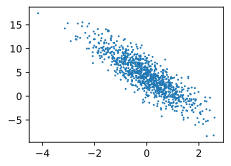

In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

def synthetic_data(w , b , num_examples):
    """ generate y = Xw + b + noise """
    ## x is a random number that averages at 0 and variance in 1.
    ## demension matches len_of_w , generate num_example examples.
    X = torch.normal(0 , 1 ,(num_examples , len(w)))

    ##  generate y 
    y = torch.matmul(X , w) + b

    ## adding noise 
    y += torch.normal(0 , 0.01 , y.shape)
    
    ## reshape and return
    return X , y.reshape((-1 , 1))

true_w = torch.tensor([2 , -3.4])
true_b = 4.2
features , labels = synthetic_data(true_w , true_b , 1000)

print('features:' , features[0] , '\nlabel' , labels[0])

# draw a pic
d2l.set_figsize()
d2l.plt.scatter(features[: , (1)].detach().numpy(), labels.detach().numpy() , 1)


In [2]:
def data_iter(batch_size, features , labels):
    """ generate a small batch from indices"""
    num_examples = len(features)
    
    # disorganize these indices
    indices = list(range(num_examples))
    
    # random read sequence
    random.shuffle(indices)
    for i in range(0 , num_examples , batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size , num_examples)])
        # return iterator
        yield features[batch_indices] , labels[batch_indices]

batch_size = 10
for X , y in data_iter(batch_size , features , labels):
    print(X , '\n' , y)
    break

tensor([[-0.0383, -0.1137],
        [ 1.1673,  0.3058],
        [-0.4171,  0.4715],
        [-1.8220, -0.5192],
        [ 0.8350, -0.3577],
        [-0.5031, -1.7594],
        [-0.6320, -0.0421],
        [-0.1713,  1.6390],
        [-1.8999, -1.4792],
        [ 0.1003, -0.5346]]) 
 tensor([[ 4.5118],
        [ 5.4964],
        [ 1.7589],
        [ 2.3079],
        [ 7.0926],
        [ 9.1772],
        [ 3.0756],
        [-1.7306],
        [ 5.4290],
        [ 6.2300]])


In [3]:
# initialize model parameters
# mean value , variance , shape , require_gradient
w = torch.normal(0, 0.01 , size=(2 , 1) , requires_grad=True)
b = torch.zeros(1 , requires_grad=True)

# def model
def linreg(X , w , b):
    """linear regression model"""
    return torch.matmul(X , w) + b

# def loss function
def squared_loss(y_hat , y):
    """caculating loss"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

# optimizion
def sgd(params , lr , batch_size):
    """
        gradient descent in a small batch
        params:list contains w and d
        lr : learning rate
    """
    # this time grad is no need to calculate
    with torch.no_grad():
        for param in params:
            # do sgd
            param -= lr * param.grad / batch_size
            # set gradinet to zero as there is a jump in params
            param.grad.zero_()

lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X , y in data_iter(batch_size , features , labels):
        l = loss(net(X , w , b) , y)
        l.sum().backward()
        sgd([w , b] , lr , batch_size)
    with torch.no_grad():
        train_l = loss(net(features , w , b) , labels)
        print(f'epoch {epoch+1} , loss {float(train_l.mean()):f}')


epoch 1 , loss 0.033324
epoch 2 , loss 0.000120
epoch 3 , loss 0.000050


In [4]:
print(f'evaluted error of w: {true_w - w.reshape(true_w.shape)}')
print(f'evaluted error of b: {true_b - b}')

evaluted error of w: tensor([ 0.0005, -0.0009], grad_fn=<SubBackward0>)
evaluted error of b: tensor([0.0003], grad_fn=<RsubBackward1>)
